In [1]:

#pip install --upgrade scikit-learn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Nlp library
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

# sklearn Library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
#from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

#Tenserflow Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding,  Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.company_profile.head()

0    We're Food52, and we've created a groundbreaki...
1    90 Seconds, the worlds Cloud Video Production ...
2    Valor Services provides Workforce Solutions th...
3    Our passion for improving quality of life thro...
4    SpotSource Solutions LLC is a Global Human Cap...
Name: company_profile, dtype: object

In [8]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
df.telecommuting.value_counts()

telecommuting
0    17113
1      767
Name: count, dtype: int64

In [10]:
df.location.value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
US, ME, Bangor             1
US, GA, COLUMBUS           1
US, MN, Eagan              1
US, MD, Accokeek           1
CA, AB, Toronto            1
Name: count, Length: 3105, dtype: int64

In [11]:
df.fraudulent.value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [12]:
df.title.value_counts()

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Java Script Developer                                   1
 PeopleSoft HR Functional Lead                          1
CRM Manager (Junior or Senior)                          1
iOS Developer Training                                  1
Senior Operational Manager                              1
Name: count, Length: 11231, dtype: int64

In [13]:
type(df.title[0])

str

In [14]:
df.title = df.title.str.strip()

In [15]:
df.title.value_counts()

title
English Teacher Abroad                                      406
Customer Service Associate                                  198
Graduates: English Teacher Abroad (Conversational)          144
Customer Service Associate - Part Time                       91
Software Engineer                                            90
                                                           ... 
Portfolio Development Associate - Paris & rest of France      1
Post Production Editor                                        1
Sr Technical Lead LIMS                                        1
Craftsman Associate                                           1
I Want To Work At Karmarama                                   1
Name: count, Length: 10915, dtype: int64

In [16]:
df.location.value_counts()

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
US, ME, Bangor             1
US, GA, COLUMBUS           1
US, MN, Eagan              1
US, MD, Accokeek           1
CA, AB, Toronto            1
Name: count, Length: 3105, dtype: int64

In [17]:
df.department.value_counts()

department
Sales                           551
Engineering                     487
Marketing                       401
Operations                      270
IT                              225
                               ... 
BCFB                              1
Google Apps                       1
Front Desk Administration         1
Technical Service                 1
Wright Satellite Connections      1
Name: count, Length: 1337, dtype: int64

In [18]:
df.salary_range.value_counts()

salary_range
0-0              142
40000-50000       66
30000-40000       55
25000-30000       37
45000-67000       37
                ... 
55000-69000        1
360000-500000      1
50000-95000        1
16-20              1
140-160            1
Name: count, Length: 874, dtype: int64

In [19]:
df.employment_type.value_counts()

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

In [20]:
df.required_experience.value_counts()

required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

In [21]:
df.required_education.value_counts()

required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

In [22]:
df.industry.value_counts()##sektör

industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Alternative Dispute Resolution            1
Shipbuilding                              1
Sporting Goods                            1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 131, dtype: int64

In [23]:
df.function.value_counts()

function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

In [24]:
df.fraudulent.value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

Visualisation

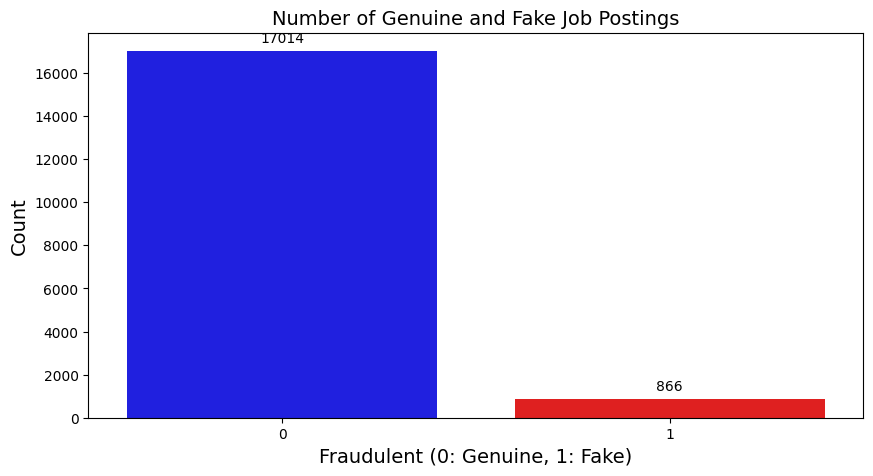

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

# Plot count of genuine (0) and fake (1) job postings
plt.figure(figsize=(10, 5))
ax = sb.countplot(x="fraudulent", data=df, palette=["blue", "red"])

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

# Set title and labels
plt.title("Number of Genuine and Fake Job Postings", fontdict={"fontsize": 14})
plt.ylabel("Count", fontdict={"fontsize": 14})
plt.xlabel("Fraudulent (0: Genuine, 1: Fake)", fontdict={"fontsize": 14})

plt.show()


Title Feature

In [26]:
title = df.title.value_counts()[:5]

In [27]:
title

title
English Teacher Abroad                                406
Customer Service Associate                            198
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate - Part Time                 91
Software Engineer                                      90
Name: count, dtype: int64

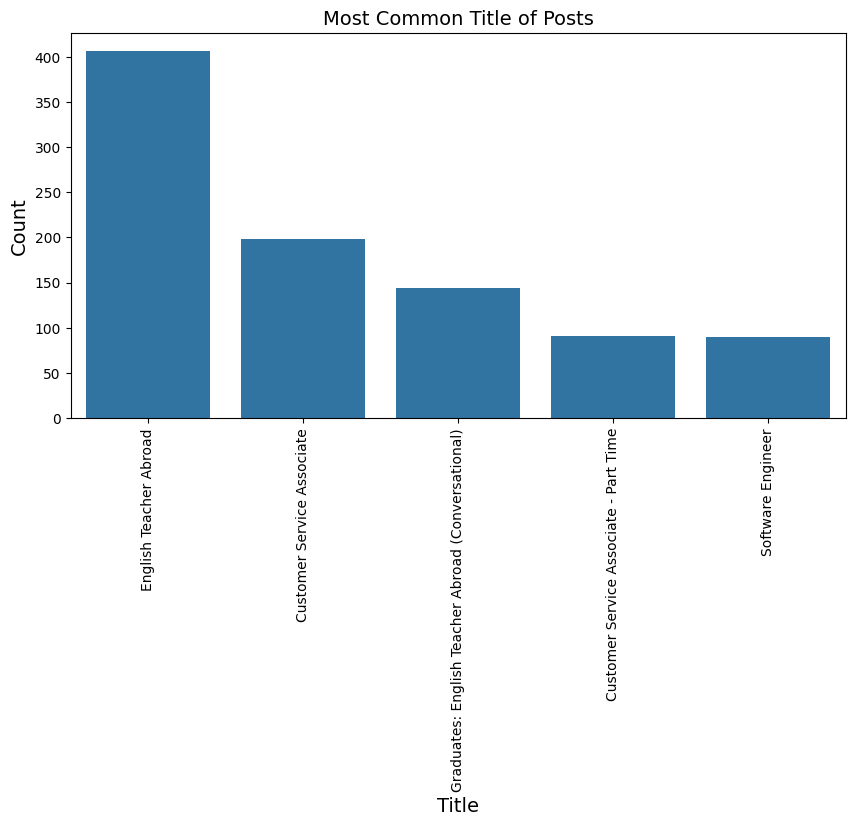

In [28]:
plt.figure(figsize = (10,5))
sb.barplot(x = title.index, y = title )
plt.title("Most Common Title of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Title", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

Location Feature

In [29]:
location_of_fraudulent = df.location[df.fraudulent == 1].value_counts()[:5]

In [30]:
location = df.location.value_counts()[:5]
location

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
Name: count, dtype: int64

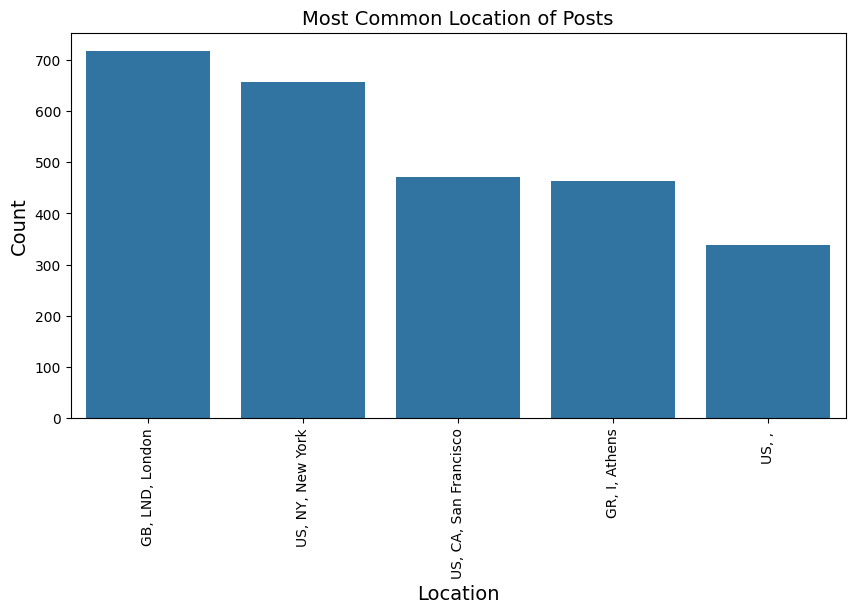

In [31]:
plt.figure(figsize=(10, 5))
sb.barplot(x=location.index, y=location)
plt.title("Most Common Location of Posts", fontdict={"fontsize": 14})
plt.xlabel("Location", fontdict={"fontsize": 14})
plt.ylabel("Count", fontdict={"fontsize": 14})
plt.xticks(rotation=90)
plt.show()

In [32]:
import seaborn as sns

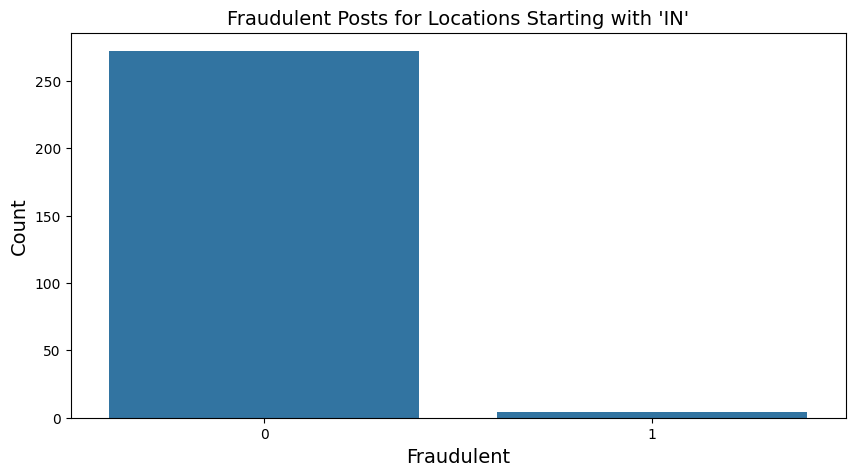

In [33]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'fraudulent' and 'location' with the actual column names in your DataFrame

# Filter DataFrame for entries where 'Location' starts with 'IN'
filtered_df = df[df['location'].str.startswith('IN', na=False)]

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x='fraudulent', data=filtered_df)
plt.title("Fraudulent Posts for Locations Starting with 'IN'", fontsize=14)
plt.xlabel("Fraudulent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

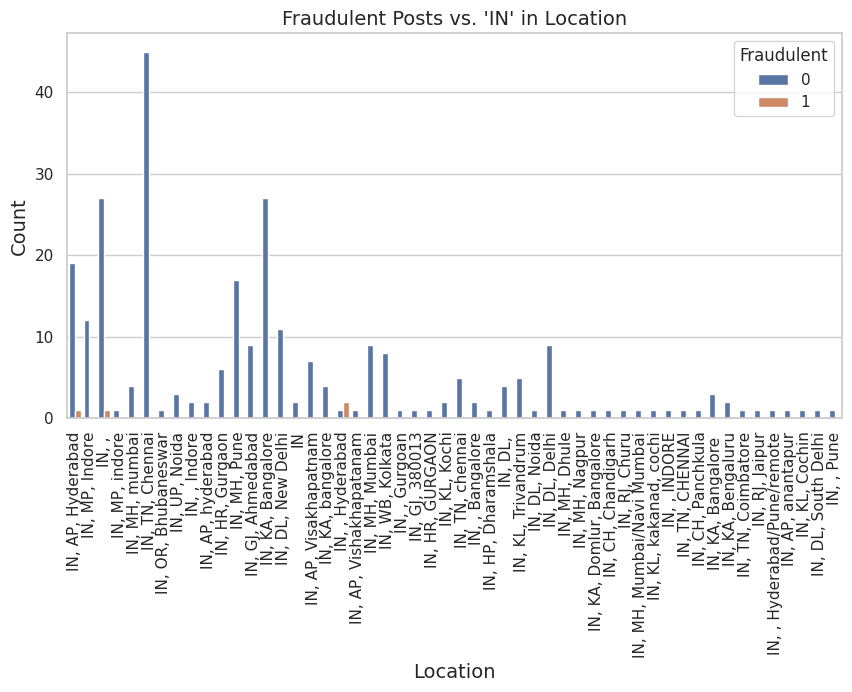

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(x='location', hue='fraudulent', data=df[df['location'].str.startswith('IN', na=False)])
plt.title("Fraudulent Posts vs. 'IN' in Location", fontsize=14)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Fraudulent", loc="upper right")
plt.show()

In [35]:
# Assuming 'country' is the column containing country names in your DataFrame
india_count = df['location'].str.startswith('IN').sum()

print(f'The count of entries with a country name starting with "IN" is: {india_count}')


The count of entries with a country name starting with "IN" is: 276


In [36]:
filtered_count = df[(df['location'].str.startswith('IN', na=False)) & (df['fraudulent'] == 1)].shape[0]
filtered_count

4

In [37]:
filtered_count1 = df[(df['location'].str.startswith('IN', na=False)) & (df['fraudulent'] == 0)].shape[0]
filtered_count1

272

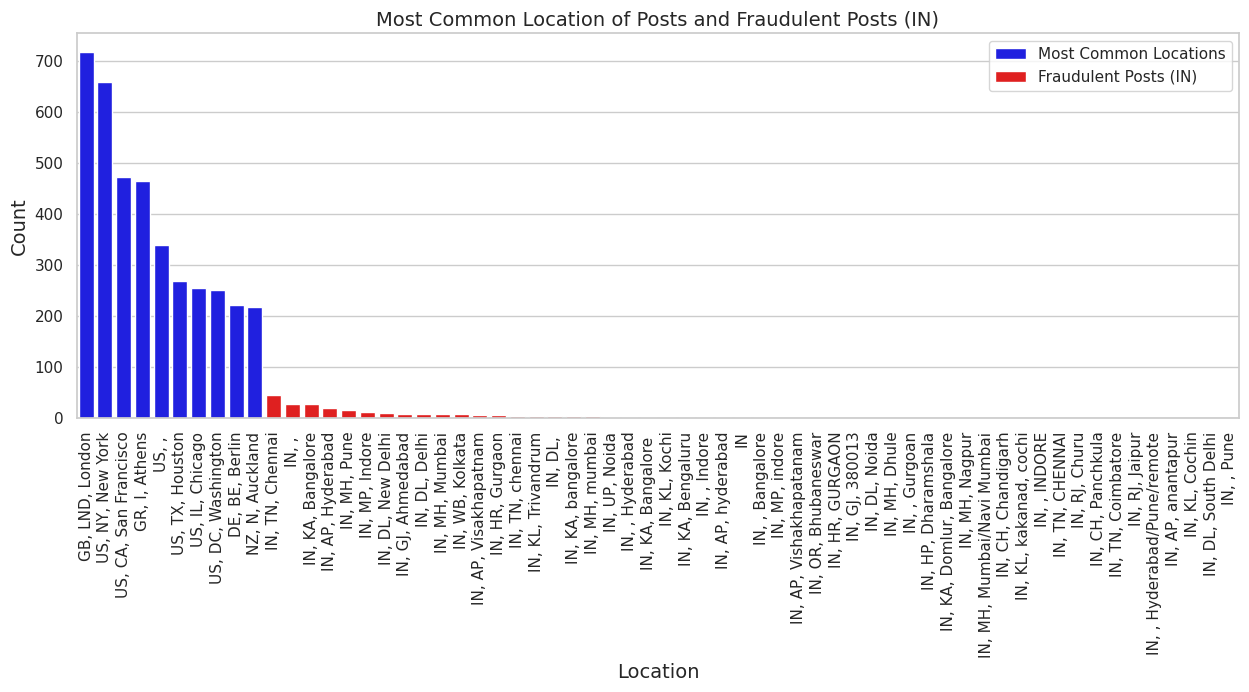

In [38]:
 #Replace 'fraudulent' and 'location' with the actual column names in your DataFrame

# Plot 1: Most Common Location of Posts
location = df['location'].value_counts().head(10)
plt.figure(figsize=(15, 5))

# Bar plot for most common locations
sns.barplot(x=location.index, y=location, color='blue', label='Most Common Locations')

# Plot 2: Fraudulent Posts for Locations Starting with 'IN'
filtered_df = df[df['location'].str.startswith('IN', na=False)]

# Bar plot for fraudulent posts in locations starting with 'IN'
sns.barplot(x=filtered_df['location'].value_counts().index, y=filtered_df['location'].value_counts(), color='red', label='Fraudulent Posts (IN)')

plt.title("Most Common Location of Posts and Fraudulent Posts (IN)", fontsize=14)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.legend()

plt.show()

Has Company Logo Feature

In [39]:
has_company_logo1 = df.has_company_logo[df.fraudulent == 1]

In [40]:
has_company_logo1 = has_company_logo1.value_counts()

In [41]:
has_company_logo1

has_company_logo
0    583
1    283
Name: count, dtype: int64

In [42]:
palette = ["red", "blue" ]

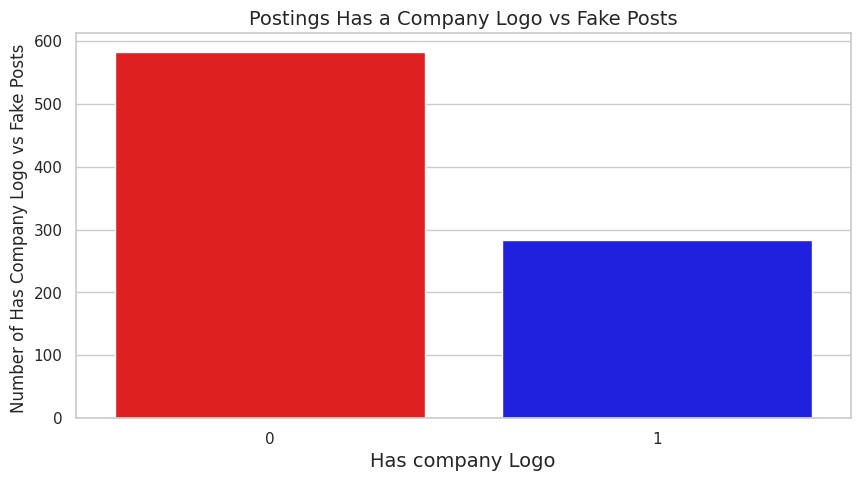

In [43]:
plt.figure(figsize = (10,5))
sb.barplot(x = has_company_logo1.index, y = has_company_logo1, palette = palette)
plt.title("Postings Has a Company Logo vs Fake Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Has company Logo", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Company Logo vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation=0);

Has questions feature

In [44]:
df.has_questions.value_counts()

has_questions
0    9088
1    8792
Name: count, dtype: int64

In [45]:
has_questions1 = df.has_questions[df.fraudulent == 1].value_counts()
has_questions1

has_questions
0    616
1    250
Name: count, dtype: int64

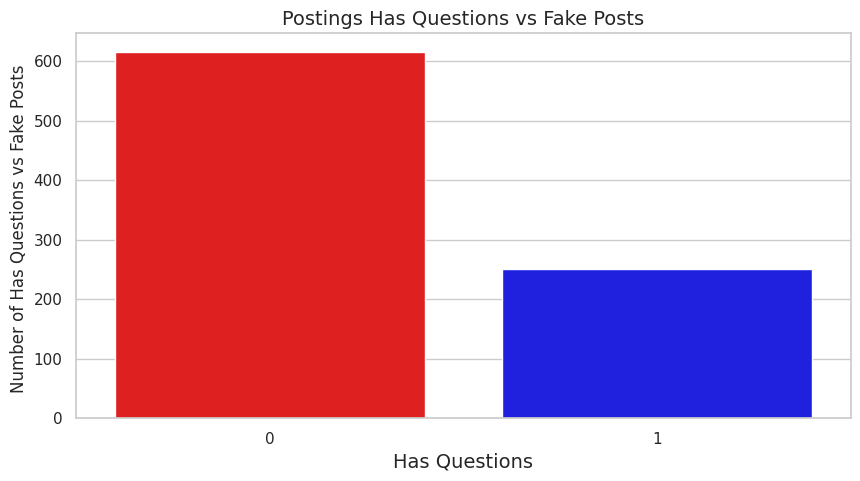

In [46]:
plt.figure(figsize = (10,5))
sb.barplot(x = has_questions1.index, y = has_questions1, palette = palette)
plt.title("Postings Has Questions vs Fake Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Has Questions", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation=0);

Employment Type

In [47]:
employment_type = df.employment_type.value_counts()
employment_type

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

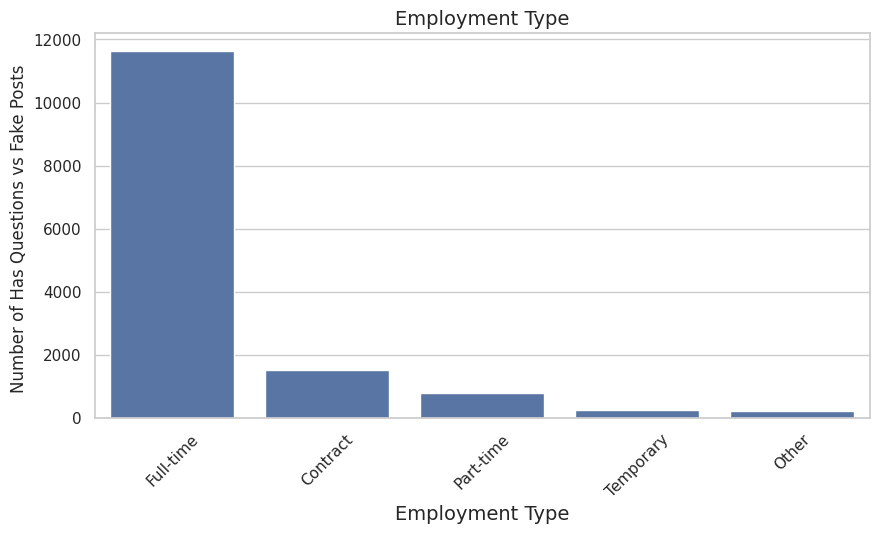

In [48]:
plt.figure(figsize = (10,5))
sb.barplot(x = employment_type.index, y = employment_type)
plt.title("Employment Type", fontdict = {"fontsize" : 14})
plt.xlabel("Employment Type", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);


Statistical Analysis

In [51]:
corr = df.corr().fraudulent
corr

ValueError: could not convert string to float: 'US, NY, New York'

Clean the dataset


In [53]:
# Combine all text in a feaure and crate text feauture will make easier using NLP

In [52]:
df.fillna(" ", inplace = True)

In [54]:
df['text'] = df['title'] + " " + df['department'] + \
             " " + df['company_profile'] + " " + \
             df['description'] + " " + \
             df['requirements'] + " " +\
             df['benefits'] + " " +\
             df['function'] + " " +\
             df['required_experience']+ " "+\
             df["required_education"]+ " " +\
             df["industry"]

In [55]:
df['text'].head()

0    Marketing Intern Marketing We're Food52, and w...
1    Customer Service - Cloud Video Production Succ...
2    Commissioning Machinery Assistant (CMA)   Valo...
3    Account Executive - Washington DC Sales Our pa...
4    Bill Review Manager   SpotSource Solutions LLC...
Name: text, dtype: object

In [56]:
# Droping the unnecessary features

df_last = df.drop(columns = ['job_id','title','location','department', 'telecommuting',
                             'salary_range','company_profile','description','requirements','benefits','employment_type',
                             'required_experience','required_education','industry','function'])
print(df_last.isna().sum())
df_last.head()

has_company_logo    0
has_questions       0
fraudulent          0
text                0
dtype: int64


,has_company_logo,has_questions,fraudulent,text
0,1,0,0,"Marketing Intern Marketing We're Food52, and w..."
1,1,0,0,Customer Service - Cloud Video Production Succ...
2,1,0,0,Commissioning Machinery Assistant (CMA) Valo...
3,1,0,0,Account Executive - Washington DC Sales Our pa...
4,1,1,0,Bill Review Manager SpotSource Solutions LLC...


Example for cleaning a dataset

In [57]:
first_description = df.description[1]

In [58]:
description = re.sub("[^a-zA-Z]", " ", first_description)

In [59]:
description = description.lower()
description

'organised   focused   vibrant   awesome do you have a passion for customer service  slick typing skills  maybe account management     and think administration is cooler than a polar bear on a jetski  then we need to hear you  we are the cloud video production service and opperating on a glodal level  yeah  it s pretty cool  serious about delivering a world class product and excellent customer service our rapidly expanding business is looking for a talented project manager to manage the successful delivery of video projects  manage client communications and drive the production process  work with some of the coolest brands on the planet and learn from a global team that are representing nz is a huge way we are entering the next growth stage of our business and growing quickly internationally   therefore  the position is bursting with opportunity for the right person entering the business at the right time     seconds  the worlds cloud video production service   http      url fbe    afa

In [60]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
description = nltk.word_tokenize(description)
len(description)

327

In [62]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [63]:
description = [ word for word in description if not word in set(stopwords.words("english"))]
len(description)

206

In [64]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [65]:
nltk.download('omw-1.4')
lemma = nlp.WordNetLemmatizer()
description = [lemma.lemmatize(word) for word in description]
len(description)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


206

In [66]:
description = " ".join(description)

Cleaning Whole Dataset

In [68]:
pip install findspark nltk


In [69]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=2344d13666c406f663991cc11a0c7ac58b36754d74be49a7097070f68c3fe83d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [71]:
text_list = []

for text in df_last.text:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.strip()
    text = nltk.word_tokenize(text)
    text = [word for word in text if not word in set(stopwords.words("english"))] # dropping stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text)

In [72]:
len(text_list)## we cleaned all text 1395

17880

In [73]:
df_last.fraudulent.value_counts(dropna = False)

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [74]:
df1 = pd.DataFrame()
df1['text'] = text_list
df1['freu'] = df_last.fraudulent

In [75]:
first_text_value = df1['text'][0]
print(first_text_value)


marketing intern marketing food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management sy

In [76]:
df1['word count'] = [len(str(i).split(' ')) if pd.notna(i) else 0 for i in df1['text']]
#df1.to_csv('cleaned.csv', index = False)

In [77]:
df1.head()

,text,freu,word count
0,marketing intern marketing food created ground...,0,256
1,customer service cloud video production succes...,0,614
2,commissioning machinery assistant cma valor se...,0,236
3,account executive washington dc sale passion i...,0,495
4,bill review manager spotsource solution llc gl...,0,381


In [78]:
sent_length = df1['word count'].max()

Word Cloud

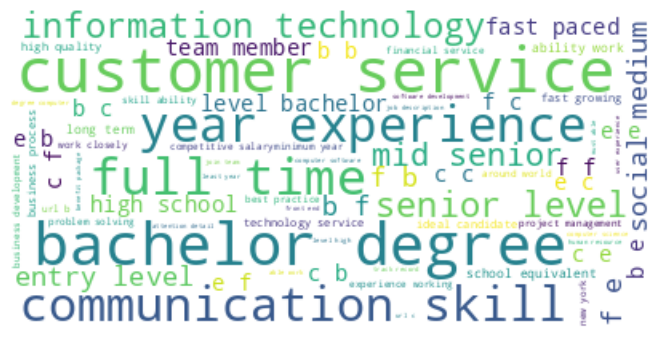

In [79]:
text = " ".join(i for i in df1['text'])
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Most Common 25 Words

In [80]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df1['text'], 25)

In [84]:
df2 = pd.DataFrame(common_words, columns=['words', 'frequency'])
fig = px.bar(df2, x='words', y='frequency',
             hover_data=['words', 'frequency'], color='frequency',
             title='Top 25 words',
             height=400,
             text_auto='.3s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


- Bag of Words

In [85]:
max_features = 10000

In [86]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [87]:
# create the tokenizer
t = Tokenizer(num_words = max_features)
# fit the tokenizer on the documents
t.fit_on_texts(text_list)

In [88]:
encoded_docs = t.texts_to_sequences(text_list)

In [89]:
import joblib
joblib.dump(t, './tokinezer_file')

['./tokinezer_file']

Embedding Representation

In [90]:
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)# all reviews must be same lenght. we equals all reviews lenght

[[   0    0    0 ...  132   26  667]
 [   0    0    0 ...  580   26  280]
 [   0    0    0 ...  568   24 1515]
 ...
 [   0    0    0 ...   10  646   11]
 [   0    0    0 ...   57  869   28]
 [   0    0    0 ...   27  122   36]]


Determine Dependent and Independent Variables

In [91]:
y = df1['freu'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
y = y.reshape(-1,1)
y.shape

(17880, 1)

In [93]:
X = np.array(embedded_docs)
X.shape

(17880, 1426)

Train and Test Split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)

In [95]:
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (16092, 1426)
X_test shape :  (1788, 1426)
y_train shape:  (16092, 1)
y_test shape :  (1788, 1)


In [96]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def eval_metrics(y_true, y_pred, unknown_value=-1):
    # Identify unknown values in y_true
    unknown_mask = y_true != unknown_value

    # Extract predicted values for the last time step
    y_pred_last_step = y_pred[:, -1]

    # Filter out unknown values in both y_true and y_pred
    y_true_filtered = y_true[unknown_mask]
    y_pred_filtered = y_pred_last_step[unknown_mask]

    # Convert to binary values
    y_true_binary = np.where(y_true_filtered > 0.5, 1, 0)
    y_pred_binary = np.where(y_pred_filtered > 0.5, 1, 0)

    # Evaluate metrics
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)


Modeling with Deep Learning

BiDirectional LSTM

In [97]:
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import keras
import keras.backend as K

In [98]:
ALPHA = 0.8
GAMMA = 1

class FocalLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(FocalLoss, self).__init__()

    def forward(self, inputs, targets, alpha=ALPHA, gamma=GAMMA, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        #first compute binary cross-entropy
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        BCE_EXP = torch.exp(-BCE)
        focal_loss = alpha * (1-BCE_EXP)**gamma * BCE

        return focal_loss

In [99]:
def focal_loss(targets, inputs, alpha=0.8, gamma=1):
    targets = K.cast(targets, dtype=K.floatx())  # Cast targets to the same data type as inputs
    inputs = K.cast(inputs, dtype=K.floatx())   # Cast inputs to the same data type as targets

    BCE = K.binary_crossentropy(targets, inputs)
    BCE_EXP = K.exp(-BCE)
    focal_loss = alpha * K.pow((1 - BCE_EXP), gamma) * BCE

    return K.mean(focal_loss)


In [100]:
from keras.layers import Embedding, Bidirectional, GRU, Dense
from keras.models import Sequential
from keras.optimizers import Adam

max_features = 10000  # Replace with your desired value
embedding_vector_features = 40
sent_length = 1426  # Replace with your desired value

# f_loss = FocalLoss(gamma=0)

model1 = Sequential()
model1.add(Embedding(max_features, embedding_vector_features, input_length=sent_length))
model1.add(Bidirectional(GRU(100, return_sequences=True)))
model1.add(Bidirectional(GRU(100, return_sequences=True)))
model1.add(Bidirectional(GRU(100, return_sequences=True)))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

adam_optimizer = Adam(lr=0.0001)
model1.compile(loss=focal_loss, optimizer=adam_optimizer, metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1426, 40)          400000    
                                                                 
 bidirectional (Bidirection  (None, 1426, 200)         85200     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1426, 200)         181200    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 1426, 200)         181200    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1426, 256)         51456     
                                                        

In [101]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#batchsize=from 16-128, epochs=50
cp = ModelCheckpoint("./bidirectional_model/best_model.h5", save_best_only=True)
hist = model1.fit(X_train, y_train, epochs=15, batch_size=48, callbacks=[cp], validation_data=(X_test, y_test))

Epoch 1/15
336/336 [==============================] - 169s 453ms/step - loss: 0.0837 - accuracy: 0.9492 - val_loss: 0.0760 - val_accuracy: 0.9547
Epoch 2/15
336/336 [==============================] - 133s 395ms/step - loss: 0.0394 - accuracy: 0.9712 - val_loss: 0.0321 - val_accuracy: 0.9763
Epoch 3/15
336/336 [==============================] - 121s 360ms/step - loss: 0.0138 - accuracy: 0.9893 - val_loss: 0.0282 - val_accuracy: 0.9797
Epoch 4/15
336/336 [==============================] - 116s 344ms/step - loss: 0.0076 - accuracy: 0.9945 - val_loss: 0.0421 - val_accuracy: 0.9806
Epoch 5/15
336/336 [==============================] - 112s 334ms/step - loss: 0.0042 - accuracy: 0.9970 - val_loss: 0.0354 - val_accuracy: 0.9829
Epoch 6/15
336/336 [==============================] - 111s 331ms/step - loss: 0.0022 - accuracy: 0.9986 - val_loss: 0.0377 - val_accuracy: 0.9810
Epoch 7/15
336/336 [==============================] - 111s 330ms/step - loss: 0.0013 - accuracy: 0.9990 - val_loss: 0.0513 -

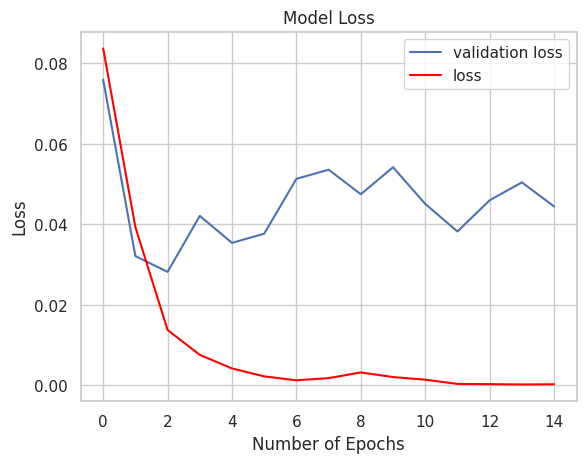

In [102]:
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='red', label="loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()#Batch Size=24

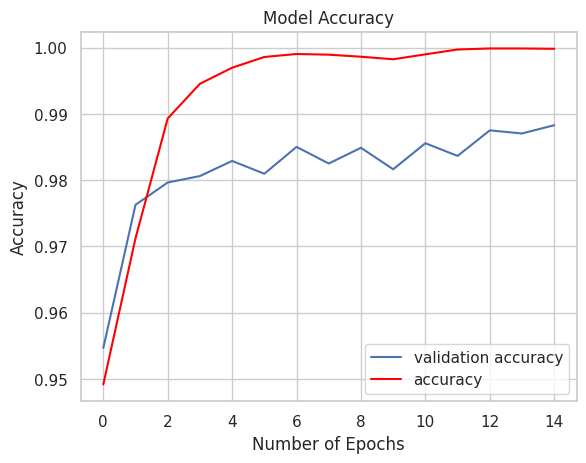

In [103]:
plt.plot(hist.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(hist.history['accuracy'], color='red', label="accuracy")
plt.title("Model Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()#batch size = 24

Prediction and Eval Metrics

In [104]:
y_pred = model1.predict(X_test)

56/56 [==============================] - 9s 107ms/step


In [105]:
y_pred = (y_pred > 0.5)

In [106]:
y_train_pred = model1.predict(X_train)

503/503 [==============================] - 57s 114ms/step


In [107]:
y_train_pred = (y_train_pred > 0.5)

In [108]:
from sklearn.metrics import confusion_matrix

unknown_value=-1
unknown_mask = y_test != unknown_value

    # Extract predicted values for the last time step
y_pred_last_step = y_pred[:, -1]

    # Filter out unknown values in both y_true and y_pred
y_true_filtered = y_test[unknown_mask]
y_pred_filtered = y_pred_last_step[unknown_mask]

    # Convert to binary values
y_true_binary = np.where(y_true_filtered > 0.5, 1, 0)
y_pred_binary = np.where(y_pred_filtered > 0.5, 1, 0)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1703    1]
 [  15   69]]


In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_true_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1704
           1       0.99      0.82      0.90        84

    accuracy                           0.99      1788
   macro avg       0.99      0.91      0.95      1788
weighted avg       0.99      0.99      0.99      1788



In [110]:

eval_metrics(y_test, y_pred)


Accuracy: 0.9911
Precision: 0.9857
Recall: 0.8214
F1 Score: 0.8961
Confusion Matrix:
[[1703    1]
 [  15   69]]


In [111]:
eval_metrics(y_train, y_train_pred)
#gru


Accuracy: 0.9994
Precision: 0.9974
Recall: 0.9910
F1 Score: 0.9942
Confusion Matrix:
[[15308     2]
 [    7   775]]


In [112]:
import pickle

# Save model using Pickle
with open('gruModel.pkl', 'wb') as f:
    pickle.dump(model1, f)


In [114]:
import h5py

# Save model using HDF5
model1.save('Gru_model.h5')
